О сервисе «СберАвтоподписка»  
«СберАвтоподписка» предлагает новый для российского рынка способ
владения автомобилем и выступает в качестве альтернативы автокредиту.
Машина — это актив, который быстро теряет в цене, поэтому мы
рекомендуем вкладывать собственные средства в финансовые инструменты,
а автомобиль брать во временное пользование за комфортную сумму
в месяц.

#### Задача 

  - изучить предоставленный датасет,
  - ответить на вопросы из общей части (подразумевающей базовую обработку данных и их разведочный анализ)  
  - выполнить задание по специализации ML-инженер.

#### План работы 

1. Подготовительная часть
   - ознакомление с предоставленным датасетом и описание атрбиутов
   - оценка и описательные статистики данных
   - приведение данных к нормальному виду для дальнейшей работы
2. Разведочный анализ данных
   - базова чистка- проверка на дубликаты, пустые значения, типизация данных,
     ненужные атрибуты
   - распределения ключевых атрибутов и их отношение
3. Задание
   - предсказать cовершение целевого действия(ROC_AUC~0.65) - факт совершения
     пользователем целевого действия
   - упаковать модель в сервис, который будет брать на вход все атрибуты, типа utm_\*, devace_\*, geo_\*,
     и отдавать на выход 0/1(1-совершит любое целевое деиствие)





   

#### Описание представленных данных

GA Sessions (ga_sessions.pkI)  
*Одна строка  = Один визит на сайт*

Описание атрибутов:

•	session_id — ID визита  
•	client_id — ID посетителя  
•	visit_date — дата визита  
•	visit_time — время визита  
•	visit_number — порядковы номер визита клиента  
•	utm_source — канал привлечения  
•	utm_medium — тип привлечения  
•	utm_campaign — рекламная компания  
•	utm_keyword — ключевое слово  
•	device_category — тип устройства  
•	device_os — ОС устройства  
•	device_brand — марка устройства  
•	device_modeI — модель устройства  
•	device_screen_resolution — разрешение устройства  
•	device_browser — браузер  
•	geo_country — страна  
•	geo_city — город  


### Импорт пакетов

In [1]:
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from  datetime import datetime

### Загрузка данных из файла

In [2]:
#df_sessions = pd.read_pickle('ga_sessions.pkl')
df_sessions = pd.read_csv('data/ga_sessions.csv', low_memory=False)

In [3]:
# вывод 5 первых строк
df_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [4]:
# размер датасета
df_sessions.shape

(1860042, 18)

### Data Preparation

### Предварительная проверка и обработка данных данных

In [5]:
# просмотр типов данных столбцов
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [6]:
# просмотр описательных характеристик столбцов
#df_sessions.describe()

In [7]:
# проверка на дубликаты 
df_sessions.duplicated().sum()

0

In [8]:
df_sessions[df_sessions.duplicated()].shape

(0, 18)

In [9]:
# проверка на нулевые значения
df_sessions.isnull().sum()

session_id                        0
client_id                         0
visit_date                        0
visit_time                        0
visit_number                      0
utm_source                       97
utm_medium                        0
utm_campaign                 219603
utm_adcontent                335615
utm_keyword                 1082061
device_category                   0
device_os                   1070138
device_brand                 367178
device_model                1843704
device_screen_resolution          0
device_browser                    0
geo_country                       0
geo_city                          0
dtype: int64

In [10]:
# вывод процента нулевых значений в столбцах
for col, is_null in zip(list(df_sessions.columns), df_sessions.isnull().sum()):    
    print(f'{is_null/df_sessions.shape[0] * 100:.2f}% --- {col}')

0.00% --- session_id
0.00% --- client_id
0.00% --- visit_date
0.00% --- visit_time
0.00% --- visit_number
0.01% --- utm_source
0.00% --- utm_medium
11.81% --- utm_campaign
18.04% --- utm_adcontent
58.17% --- utm_keyword
0.00% --- device_category
57.53% --- device_os
19.74% --- device_brand
99.12% --- device_model
0.00% --- device_screen_resolution
0.00% --- device_browser
0.00% --- geo_country
0.00% --- geo_city


In [11]:
# просмотр уникальных значений по столбцам
df_sessions.nunique()

session_id                  1860042
client_id                   1391719
visit_date                      226
visit_time                    85318
visit_number                    537
utm_source                      293
utm_medium                       56
utm_campaign                    412
utm_adcontent                   286
utm_keyword                    1219
device_category                   3
device_os                        13
device_brand                    205
device_model                    104
device_screen_resolution       5039
device_browser                   57
geo_country                     166
geo_city                       2548
dtype: int64

In [12]:
# столбцы где пустых значений более 10%
on_drop = []
for col, is_null in zip(list(df_sessions.columns), df_sessions.isnull().sum()):
    null_10 = is_null/df_sessions.shape[0] * 100
    if null_10 > 10:
        on_drop.append(col)

print(f'столбцы с большим количеством пропусков {on_drop}')

столбцы с большим количеством пропусков ['utm_campaign', 'utm_adcontent', 'utm_keyword', 'device_os', 'device_brand', 'device_model']


####  Обработка пропусков в столбце utm_source

In [13]:
# количество пропусков
df_sessions.utm_source.isna().sum()

97

In [14]:
df_sessions.utm_source.value_counts()

utm_source
ZpYIoDJMcFzVoPFsHGJL    578290
fDLlAcSmythWSCVMvqvL    300575
kjsLglQLzykiRbcDiGcD    266354
MvfHsxITijuriZxsqZqt    186199
BHcvLfOaCWvWTykYqHVe    116320
                         ...  
GYkgJdhSxirUFPHFiYSe         1
WRHPhoRKhKxaenRCLBfo         1
tjKUGseGMhkLEzdCqBRx         1
wpmatvDuiMutnvmNVPJo         1
BellrslNBZQZaIxVFGXJ         1
Name: count, Length: 293, dtype: int64

In [15]:
# заполним пропуски самым популярным значением из канала привлечения
df_sessions.utm_source = df_sessions.utm_source.fillna('ZpYIoDJMcFzVoPFsHGJL')

In [16]:
# проверка на пропуски после заполнения
df_sessions.utm_source.isna().sum()

0

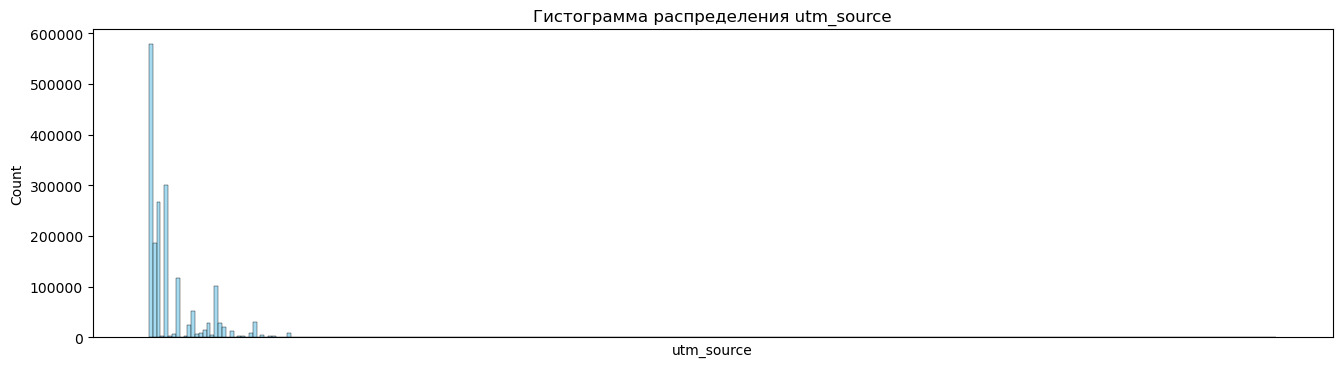

In [117]:
# график распределения параметров по каналу привлечения
plt.figure(figsize=(16,4))
plt.xticks([])
plt.xlabel('utm_source')
sns.histplot(data=df_sessions, x='utm_source', color='skyblue')
plt.title('Гистограмма распределения utm_source')
plt.show()

#### Обработка значений в столбце utm_medium

In [18]:
# просмотр пипов значений
df_sessions.utm_medium.value_counts()

utm_medium
banner               552272
cpc                  434794
(none)               300575
cpm                  242083
referral             152050
organic               63034
email                 29240
push                  28035
stories               10582
cpv                    8022
blogger_channel        8015
smartbanner            6794
blogger_stories        4312
cpa                    4279
tg                     4011
app                    2836
post                   2326
smm                    1985
outlook                1332
clicks                  934
blogger_header          771
(not set)               480
info_text               343
sms                     239
landing                 134
partner                  97
fb_smm                   66
vk_smm                   65
link                     57
cbaafe                   47
CPM                      40
yandex_cpc               36
ok_smm                   28
static                   22
google_cpc               20
article  

In [19]:
# просмотр уникальных значений 
df_sessions.utm_medium.unique()

array(['banner', 'cpm', 'cpc', 'organic', '(none)', 'referral', 'smm',
       'stories', 'blogger_channel', 'blogger_stories', 'email', 'app',
       'vk_smm', 'cpv', 'push', 'partner', 'tg', 'cpa', 'post',
       'smartbanner', 'info_text', 'outlook', 'clicks', 'landing',
       'blogger_header', 'qr', '(not set)', 'fb_smm', 'nkp', 'google_cpc',
       'sms', 'article', 'users_msk', 'static', 'ok_smm', 'cbaafe',
       'Sbol_catalog', 'landing_interests', 'yandex_cpc', 'web_polka',
       'linktest', 'sber_app', 'CPM', 'medium', 'tablet', 'promo_sbol',
       'reach', 'desktop', 'dom_click', 'social', 'catalogue',
       'main_polka', 'last', 'link', 'qrcodevideo', 'promo_sber'],
      dtype=object)

In [20]:
# заполню значения (not set) модой
df_sessions['utm_medium'] = df_sessions.apply(lambda x: df_sessions.utm_medium.mode()[0] if x['utm_medium'] == '(not set)'
                                             else x['utm_medium'], axis=1)

In [21]:
# замена значений '(none)' на 'organic'
df_sessions['utm_medium'] = df_sessions.apply(lambda x: 'organic' if x['utm_medium'] == '(none)'
                                             else x['utm_medium'], axis=1)

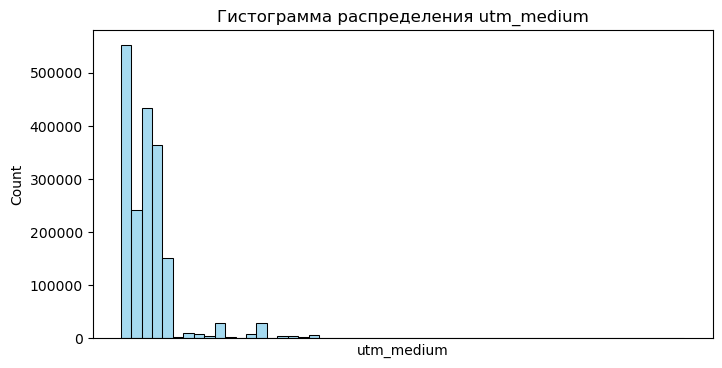

In [110]:
# график распределения параметров по типу привлечения
plt.figure(figsize=(8,4))
plt.xticks([])
plt.xlabel('utm_medium')
sns.histplot(data=df_sessions, x='utm_medium', color='skyblue')
plt.title('Гистограмма распределения utm_medium')
plt.show()

#### Обработка пропусков в столбце device_os

In [23]:
# количество пропусков
df_sessions.device_os.isna().sum()

1070138

In [24]:
# просмтор типов OS на устройствах
df_sessions.device_os.value_counts(dropna=False)

device_os
NaN              1070138
Android           464054
iOS               207104
Windows            88307
Macintosh          24824
Linux               5120
(not set)            364
Chrome OS             83
BlackBerry            27
Tizen                  7
Samsung                4
Windows Phone          4
Firefox OS             3
Nokia                  3
Name: count, dtype: int64

In [25]:
# посмотрим на строки содержащие пропуски
df_sessions[df_sessions.device_os.isna()].head(10)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
5,9055447192389856083.1622453074.1622453074,2108385598.1622453075,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,375x812,Safari,Russia,Saint Petersburg
7,9055461992850812764.1626107740.1626107740,2108389044.1626107740,2021-07-12,19:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,360x640,Chrome,Russia,Saint Petersburg
9,9055466554104774132.1624800757.1624800757,2108390106.1624800756,2021-06-27,16:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,412x915,Chrome,Russia,Moscow
10,9055466554104774132.1629442326.1629442326,2108390106.1624800756,2021-08-20,09:00:00,2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,412x915,Chrome,Russia,Moscow
11,9055469620715506713.1628883994.1628883994,2108390820.1628883993,2021-08-13,22:00:00,1,fDLlAcSmythWSCVMvqvL,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,412x869,Android Webview,Russia,Saint Petersburg
12,9055469620715506713.1633110583.1633110583,2108390820.1628883993,2021-10-01,20:00:00,2,fDLlAcSmythWSCVMvqvL,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,412x869,Android Webview,Russia,Saint Petersburg
15,9055476398179250925.1634235280.1634235280,2108392398.1634235117,2021-10-14,21:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,412x915,Chrome,Russia,Yaroslavl
17,9055487955932503299.1630493885.1630493885,2108395089.1630493955,2021-09-01,13:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Mytishchi


In [26]:
# типы устройств с OS
df_sessions.device_brand.value_counts()

device_brand
Apple       551088
Samsung     332194
Xiaomi      288367
Huawei      185853
Realme       19058
             ...  
Vodafone         1
Wexler           1
KingSing         1
Star             1
Opera            1
Name: count, Length: 205, dtype: int64

In [27]:
# заполним пропуски согласно моделям мобильных устройст с операционной системой Android

android_mobile_device = list(set(df_sessions.device_brand.values))
android_mobile_device.remove("Apple")  # удаление устройств с IOS


df_sessions['device_os'] = df_sessions.apply(lambda x: 'Android' if pd.isna(x['device_os']) and 
                                             x['device_category'] == 'mobile' and (x['device_brand'] 
                                             in android_mobile_device) else x['device_os'], axis=1)

In [28]:
# заполним пропуски согласно моделям мобильных устройст с операционной системой IOS
df_sessions['device_os'] = df_sessions.apply(lambda x: 'IOS' if pd.isna(x['device_os']) and 
                                             x['device_category'] == 'mobile' and (x['device_brand'] 
                                             == 'Apple') else x['device_os'], axis=1)

# сделаю замену всех значений iOS для device_os на IOS
df_sessions['device_os'] = df_sessions.apply(lambda x: 'IOS' if x['device_os'] == 'iOS' else x['device_os'], axis=1)


In [29]:
# проверка на пропуск после зополнения по device_brand
df_sessions.device_os.isna().sum() 

259857

In [30]:
# типы OS определяются устройством и видом браузера при входе, поэтому посмотрим device_browser
df_sessions.device_browser.value_counts()

device_browser
Chrome                              1013436
Safari                               478562
YaBrowser                            133311
Safari (in-app)                       69912
Android Webview                       55369
Samsung Internet                      47309
Opera                                 26817
Firefox                               16588
Edge                                  16065
UC Browser                              871
Android Runtime                         392
Mozilla Compatible Agent                362
[FBAN                                   269
Instagram 208.0.0.32.135 Android        140
Instagram 209.0.0.21.119 Android        111
MRCHROME                                 77
Android Browser                          49
Opera Mini                               45
Puffin                                   45
Internet Explorer                        36
Maxthon                                  31
Android                                  22
Instagram 216.1.0

In [31]:
# заполним пропуски значением 'Apple', где device_browser == Safari или Safari (in-app)

df_sessions['device_os'] = df_sessions.apply(lambda x: 'Apple' if pd.isna(x['device_os'])
                                             and (x['device_browser'] == 'Safari' or x['device_browser'] == 'Safari (in-app)')
                                             else x['device_os'], axis=1)

In [32]:
# типы устройств с которых осуществляется вход,  посмотрим device_category
df_sessions.device_category.value_counts()

device_category
mobile     1474871
desktop     366863
tablet       18308
Name: count, dtype: int64

In [33]:
# заполним пропуски значением 'Windows', где device_category == desktop	

df_sessions['device_os'] = df_sessions.apply(lambda x: 'Windows' if pd.isna(x['device_os'])
                                             and (x['device_category'] == 'desktop')
                                             else x['device_os'], axis=1)

In [34]:
# заполним пропуски значением 'Android', где device_category == tablet

df_sessions['device_os'] = df_sessions.apply(lambda x: 'Android' if pd.isna(x['device_os'])
                                             and (x['device_category'] == 'tablet')
                                             else x['device_os'], axis=1)


In [35]:
# проверка на пропуски после заполнеиня пр device_browser и device_category
df_sessions.device_os.isna().sum() 

0

In [36]:
# оставшиеся  значения (not set)  используются в двух типах устройств
df_sessions[df_sessions['device_os']=='(not set)'].device_category.value_counts()

device_category
desktop    344
mobile      20
Name: count, dtype: int64

In [37]:
# браузер используемый для входа c OS определенной как (not set)
df_sessions[df_sessions['device_os']=='(not set)'].device_browser.value_counts()

device_browser
Mozilla Compatible Agent            260
[FBAN                                24
Opera Mini                           20
Instagram 216.1.0.21.137 Android     19
Chrome                               13
helloworld                            6
(not set)                             6
Instagram 212.0.0.38.119 Android      6
Instagram 213.0.0.29.120 Android      5
Android                               4
Instagram 206.1.0.34.121 Android      1
Name: count, dtype: int64

In [38]:
# замена всех значений (not set), кроме популярных на other
os = list(((df_sessions.device_os.value_counts(dropna=False) / df_sessions.shape[0]).index)[:6])

df_sessions['device_os'] = df_sessions.apply(lambda x: 'other' if x['device_os'] == '(not set)' or 
                                             x['device_os'] not in os else x['device_os'], axis=1)


In [39]:
df_sessions.device_os.value_counts()

device_os
Android      943573
IOS          546647
Windows      309172
Apple         30211
Macintosh     24824
Linux          5120
other           495
Name: count, dtype: int64

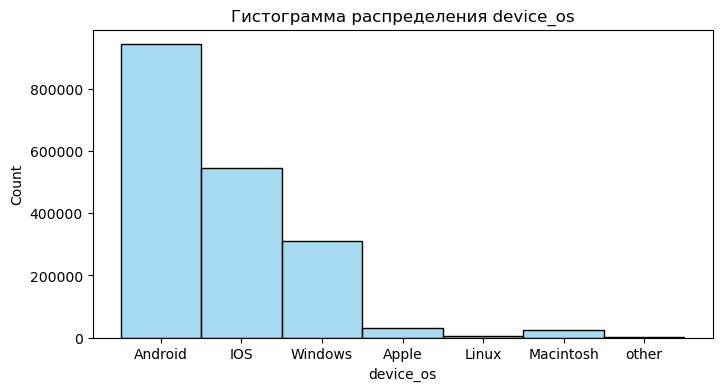

In [109]:
# график распределения параметров по ОС устройства
plt.figure(figsize=(8,4))
#plt.xticks([])
plt.xlabel('device_os')
sns.histplot(data=df_sessions, x='device_os', color='skyblue')
plt.title('Гистограмма распределения device_os')
plt.show()

#### Обработка значений в столбце utm_campaign

In [40]:
# количество пропущенных значений в столбце utm_campaign
df_sessions.utm_campaign.isna().sum()

219603

In [41]:
# типы значений по виду рекламной компании
df_sessions.utm_campaign.value_counts(dropna=False)

utm_campaign
LTuZkdKfxRGVceoWkVyg    463481
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
NaN                     219603
gecBYcKZCPMcVYdSSzKP    134042
                         ...  
RkpOyeEPgcMBSDuHLQcj         1
pcvPxfVFaAmhwFmvIeYd         1
qPDTdivQVeflLjTYIJnG         1
MHdHrBKQwbDaRalwnlJq         1
cXxuwXPoQCvAXPHpFcZl         1
Name: count, Length: 413, dtype: int64

In [42]:
# просмотр строк с пустыми значениями по столбцу
df_sessions[df_sessions.utm_campaign.isna()].head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,Android,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,Android,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
14,9055469620715506713.1636559415.1636559415,2108390820.1628883993,2021-11-10,18:50:15,4,SzZERoLMmrEUEhDaYcyN,cpc,NaN,NaN,NaN,mobile,Android,Samsung,NaN,412x869,Android Webview,Russia,Saint Petersburg
27,9055504865227535872.1639282176.1639282176,2108399026.1639282176,2021-12-12,07:09:36,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,okTXSMadDkjvntEHzIjp,mobile,Android,Samsung,NaN,385x854,Chrome,Russia,Moscow
38,905553874150070422.1639028922.1639028922,210840691.1639028886,2021-12-09,08:48:42,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,cdPAGAvKeBGoqAkQBuGR,mobile,IOS,Apple,NaN,375x812,Safari,Russia,Moscow


In [43]:
# значения в процентах по виду рекламной компании от общего числа 
df_sessions.utm_campaign.value_counts() / df_sessions.shape[0] * 100

utm_campaign
LTuZkdKfxRGVceoWkVyg    24.917771
LEoPHuyFvzoNfnzGgfcd    17.421327
FTjNLDyTrXaWYgZymFkV    13.298624
gecBYcKZCPMcVYdSSzKP     7.206396
TmThBvoCcwkCZZUWACYq     1.429914
                          ...    
cqgnjDbqrtCipVvzhxqa     0.000054
AdtHYglxfCpTpwZeTAuW     0.000054
pcvPxfVFaAmhwFmvIeYd     0.000054
qPDTdivQVeflLjTYIJnG     0.000054
cXxuwXPoQCvAXPHpFcZl     0.000054
Name: count, Length: 412, dtype: float64

In [44]:
# для заполнения использую значения utm_campaign более 5 %
campaign = ['LTuZkdKfxRGVceoWkVyg', 'LEoPHuyFvzoNfnzGgfcd', 'FTjNLDyTrXaWYgZymFkV', 'gecBYcKZCPMcVYdSSzKP']

# заполню рандомно из выбранных значений
df_sessions['utm_campaign'] = df_sessions.apply(lambda x: (random.choice(campaign)) if pd.isna(x['utm_campaign'])
                                                else x['utm_campaign'], axis=1)

In [45]:
df_sessions.utm_campaign.value_counts(dropna=False)

utm_campaign
LTuZkdKfxRGVceoWkVyg    518296
LEoPHuyFvzoNfnzGgfcd    378758
FTjNLDyTrXaWYgZymFkV    302385
gecBYcKZCPMcVYdSSzKP    189091
TmThBvoCcwkCZZUWACYq     26597
                         ...  
cqgnjDbqrtCipVvzhxqa         1
AdtHYglxfCpTpwZeTAuW         1
pcvPxfVFaAmhwFmvIeYd         1
qPDTdivQVeflLjTYIJnG         1
cXxuwXPoQCvAXPHpFcZl         1
Name: count, Length: 412, dtype: int64

In [46]:
# для значений рекламной компании менее 5% сделю замену на other_campaing
df_sessions['utm_campaign'] = df_sessions.apply(lambda x: 'other_campaign' if x['utm_campaign'] 
                                                not in ['LTuZkdKfxRGVceoWkVyg', 'LEoPHuyFvzoNfnzGgfcd', 'FTjNLDyTrXaWYgZymFkV', 'gecBYcKZCPMcVYdSSzKP'] 
                                                else x['utm_campaign'], axis=1)

df_sessions.utm_campaign.value_counts(dropna=False)

utm_campaign
LTuZkdKfxRGVceoWkVyg    518296
other_campaign          471512
LEoPHuyFvzoNfnzGgfcd    378758
FTjNLDyTrXaWYgZymFkV    302385
gecBYcKZCPMcVYdSSzKP    189091
Name: count, dtype: int64

In [47]:
# проверка на пропуски после заполнения
df_sessions.utm_campaign.isna().sum()

0

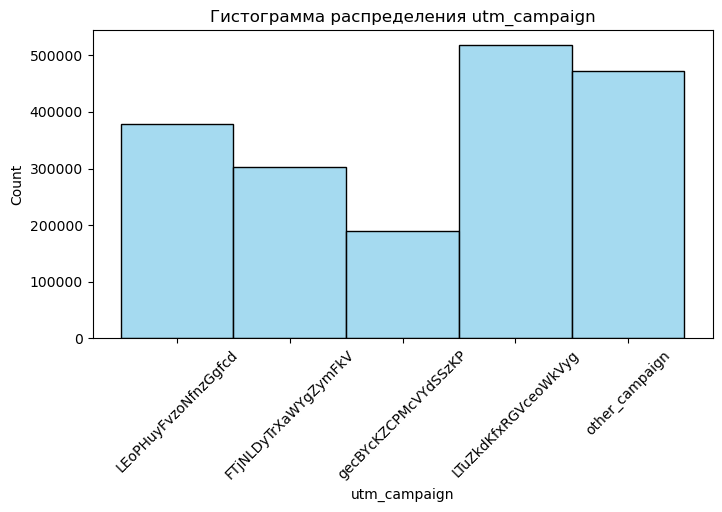

In [120]:
# график распределения параметров по питу рекламной компании
plt.figure(figsize=(8,4))
plt.xticks(rotation=45)
plt.xlabel('utm_campaign')
sns.histplot(data=df_sessions, x='utm_campaign', color='skyblue')
plt.title('Гистограмма распределения utm_campaign')
plt.show()

#### Обработка значений в столбце utm_adcontent

In [48]:
df_sessions.utm_adcontent.isna().sum()

335615

In [49]:
df_sessions.utm_adcontent.value_counts(dropna=False)

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    1006599
NaN                      335615
vCIpmpaGBnIQhyYNkXqp     181048
xhoenQgDQsgfEPYNPwKO     113072
PkybGvWbaqORmxjNunqZ      60316
                         ...   
vXARZToVDdvNhALiQtvl          1
ryswqHdLvbezpDLjokYF          1
gQEnaeQmOHisHSTEyzhp          1
PlanrlymnpCeYvUrUTVJ          1
oJivRDNIrrOckRBIKOtG          1
Name: count, Length: 287, dtype: int64

In [50]:
# заполню пропуски предыдущим ненулевым значением
df_sessions['utm_adcontent'] = df_sessions['utm_adcontent'].ffill()

In [51]:
# значения в процентах по типу рекламного контента
(df_sessions.utm_adcontent.value_counts(dropna=False) / df_sessions.shape[0] * 100)[:10]

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    66.589249
vCIpmpaGBnIQhyYNkXqp    11.726509
xhoenQgDQsgfEPYNPwKO     7.220590
PkybGvWbaqORmxjNunqZ     3.855827
LLfCasrxQzJIyuldcuWy     1.595287
TuyPWsGQruPMpKvRxeBF     1.194113
UxrnyMlRBSOhOjytXnMG     0.890948
dUuXlWzvmhDSyclWRhNP     0.664609
yYdBRbPmBMUZHXwqGxNx     0.642835
WYLajZgbUhGimwBKDZUH     0.556977
Name: count, dtype: float64

In [52]:
# для значений рекламного контента менее 3% сделаю замену на other_content
content = list(((df_sessions.utm_adcontent.value_counts(dropna=False) / df_sessions.shape[0]).index)[:4])

df_sessions['utm_adcontent'] = df_sessions.apply(lambda x: 'other_content' if x['utm_adcontent'] 
                                                not in content else x['utm_adcontent'], axis=1)

df_sessions.utm_adcontent.value_counts(dropna=False)

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    1238588
vCIpmpaGBnIQhyYNkXqp     218118
other_content            197310
xhoenQgDQsgfEPYNPwKO     134306
PkybGvWbaqORmxjNunqZ      71720
Name: count, dtype: int64

In [53]:
# проверка на пропуски после заполнения
df_sessions.utm_adcontent.isna().sum()

0

#### Обработка пропусков device_brand

In [54]:
# количестко пропущенных значений в столбце
df_sessions.device_brand.isna().sum()

367178

In [55]:
# типы устройств с которых заходили посетители
df_sessions.device_brand.value_counts(dropna=False)

device_brand
Apple       551088
NaN         367178
Samsung     332194
Xiaomi      288367
Huawei      185853
             ...  
Vodafone         1
Wexler           1
KingSing         1
Star             1
Opera            1
Name: count, Length: 206, dtype: int64

In [56]:
# заполню пропуски 'other'
df_sessions['device_brand'] = df_sessions['device_brand'].fillna('other')

In [57]:
# заполню значения (not set) также на 'other'
df_sessions['device_brand'] = df_sessions.apply(lambda x: 'other' if x['device_brand'] == '(not set)'
                                             else x['device_brand'], axis=1)

In [58]:
# значения в процентах для бренда устройства
(df_sessions.device_brand.value_counts(dropna=False) / df_sessions.shape[0] *100)[:10]

device_brand
Apple      29.627718
other      20.683565
Samsung    17.859489
Xiaomi     15.503252
Huawei      9.991871
Realme      1.024601
OPPO        0.726005
Vivo        0.631169
OnePlus     0.535741
Asus        0.426281
Name: count, dtype: float64

In [59]:
# # для значений менее 9% также сделаю замену на other
device = list(((df_sessions.device_brand.value_counts(dropna=False) / df_sessions.shape[0]).index)[:5])

df_sessions['device_brand'] = df_sessions.apply(lambda x: 'other' if x['device_brand'] 
                                                not in device else x['device_brand'], axis=1)

df_sessions.device_brand.value_counts(dropna=False)

device_brand
Apple      551088
other      502540
Samsung    332194
Xiaomi     288367
Huawei     185853
Name: count, dtype: int64

In [60]:
# проверка на пропуски после заполнения
df_sessions.utm_adcontent.isna().sum()

0

#### Удаление неинформативых столбцов


In [61]:
# столбцы 'utm_keyword', 'device_model' удалю, так как слишком много пропущенных значений
df_sessions = df_sessions.drop(columns=['utm_keyword', 'device_model'])

In [62]:
# после предобработки датасета пропущеннызх значений не осталось
df_sessions.isna().sum()

session_id                  0
client_id                   0
visit_date                  0
visit_time                  0
visit_number                0
utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
device_category             0
device_os                   0
device_brand                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
dtype: int64

#### Обработка значений (not set) device_browser	

In [63]:
# просмотр значений по столбцу
df_sessions.device_browser.value_counts()

device_browser
Chrome                              1013436
Safari                               478562
YaBrowser                            133311
Safari (in-app)                       69912
Android Webview                       55369
Samsung Internet                      47309
Opera                                 26817
Firefox                               16588
Edge                                  16065
UC Browser                              871
Android Runtime                         392
Mozilla Compatible Agent                362
[FBAN                                   269
Instagram 208.0.0.32.135 Android        140
Instagram 209.0.0.21.119 Android        111
MRCHROME                                 77
Android Browser                          49
Opera Mini                               45
Puffin                                   45
Internet Explorer                        36
Maxthon                                  31
Android                                  22
Instagram 216.1.0

In [64]:
# количество строк с (not set)
df_sessions[df_sessions.device_browser == '(not set)'].shape

(17, 16)

In [65]:
# заполнять не обязательно, далее все признаки уйдут в other
# заполню значения (not set) модой
#df_sessions['device_browser'] = df_sessions.apply(lambda x: df_sessions.device_browser.mode()[0] if x['device_browser'] == '(not set)' else x['device_browser'], axis=1)

In [66]:
# заполню значения с Instagram значением Android
#df_sessions['device_browser'] = df_sessions.apply(lambda x: 'Android' if x['device_browser'].split()[0] == 'Instagram' else x['device_browser'], axis=1)

In [67]:
# замена всех значений типа браузера, количество которых менее 16000 на other
brouser_name = ['Chrome', 'Safari', 'Safari (in-app)', 'Android Webview', 'Samsung Internet', 'Opera', 'Firefox', 'Edge']

df_sessions['device_browser'] = df_sessions.apply(lambda x: 'other' if x['device_browser'] not in brouser_name else x['device_browser'], axis=1)


In [68]:
df_sessions.device_browser.value_counts()

device_browser
Chrome              1013436
Safari               478562
other                135984
Safari (in-app)       69912
Android Webview       55369
Samsung Internet      47309
Opera                 26817
Firefox               16588
Edge                  16065
Name: count, dtype: int64

#### Обработка значений (not set) geo_country	

In [69]:
df_sessions.geo_country.value_counts()

geo_country
Russia                 1800565
United States            11784
Ukraine                   9012
Ireland                   4034
Belarus                   3636
                        ...   
Zambia                       1
Malawi                       1
Réunion                      1
Barbados                     1
Congo - Brazzaville          1
Name: count, Length: 166, dtype: int64

In [70]:
# количество строк с (not set)
df_sessions[df_sessions.geo_country == '(not set)'].shape

(1146, 16)

In [71]:
# заполню значения (not set) модой
df_sessions['geo_country'] = df_sessions.apply(lambda x: df_sessions.geo_country.mode()[0] if x['geo_country'] == '(not set)'
                                             else x['geo_country'], axis=1)

In [72]:
# значения в процентах для страны
(df_sessions.geo_country.value_counts(dropna=False) / df_sessions.shape[0] *100)[:10]

geo_country
Russia           96.863996
United States     0.633534
Ukraine           0.484505
Ireland           0.216877
Belarus           0.195479
Sweden            0.144835
Kazakhstan        0.122524
Germany           0.119997
Turkey            0.104998
Netherlands       0.083278
Name: count, dtype: float64

In [73]:
# для всех значений geo_country кроме Russia сделаю замену на other
df_sessions['geo_country'] = df_sessions.apply(lambda x: x['geo_country'] if x['geo_country'] == 'Russia' else 'other', axis=1)

df_sessions.geo_country.value_counts(dropna=False)

geo_country
Russia    1801711
other       58331
Name: count, dtype: int64

#### Обработка значений (not set) geo_city

In [74]:
df_sessions.geo_city.value_counts()

geo_city
Moscow              805329
Saint Petersburg    296788
(not set)            78172
Yekaterinburg        35788
Krasnodar            32243
                     ...  
Sherbrooke               1
Albion                   1
Bornheim                 1
Huntley                  1
Sommerda                 1
Name: count, Length: 2548, dtype: int64

In [75]:
df_sessions[df_sessions.geo_city == '(not set)'].shape

(78172, 16)

In [76]:
# заполню значения (not set) other
df_sessions['geo_city'] = df_sessions.apply(lambda x: 'other' if x['geo_city'] == '(not set)'
                                             else x['geo_city'], axis=1)

In [77]:
#проверка исходного датасета на пропуски после всех преобразований
df_sessions.isna().sum()

session_id                  0
client_id                   0
visit_date                  0
visit_time                  0
visit_number                0
utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
device_category             0
device_os                   0
device_brand                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
dtype: int64

In [78]:
# сохраню предварительно запоненный датасет в файл
df_sessions.to_csv('data/ga_sessions_full.csv', index=False)

### Генерация новых признаков


In [79]:
# загрузка датасета
df_sessions = pd.read_csv('data/ga_sessions_full.csv', low_memory=False)

In [80]:
df_sessions.head(5)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,gecBYcKZCPMcVYdSSzKP,other_content,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,gecBYcKZCPMcVYdSSzKP,other_content,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow


In [81]:
df_sessions.dtypes

session_id                  object
client_id                   object
visit_date                  object
visit_time                  object
visit_number                 int64
utm_source                  object
utm_medium                  object
utm_campaign                object
utm_adcontent               object
device_category             object
device_os                   object
device_brand                object
device_screen_resolution    object
device_browser              object
geo_country                 object
geo_city                    object
dtype: object

#### Признаки на основе visit_date

In [82]:
# преобразую данные из столбца visit_date в формат времени
df_sessions['visit_date'] = pd.to_datetime(df_sessions.visit_date)

In [83]:
df_sessions.visit_date.dtypes

dtype('<M8[ns]')

In [84]:
df_sessions.visit_date

0         2021-11-24
1         2021-11-14
2         2021-12-28
3         2021-05-29
4         2021-05-29
             ...    
1860037   2021-12-22
1860038   2021-05-26
1860039   2021-11-15
1860040   2021-11-29
1860041   2021-12-31
Name: visit_date, Length: 1860042, dtype: datetime64[ns]

In [85]:
df_sessions.visit_date.dt.year.value_counts()
# все записи за 2021 год

visit_date
2021    1860042
Name: count, dtype: int64

In [86]:
df_sessions.visit_date.dt.month.value_counts()
# все записи с мая по декабрь

visit_date
12    399102
11    297769
10    281622
9     257478
7     185244
6     166470
8     164155
5     108202
Name: count, dtype: int64

In [87]:
# на остнове visit_date создам несколько новых признаков
# день недели когда клиен заходил на сайт
df_sessions['day_of_the_week'] = df_sessions.visit_date.dt.day_name()
df_sessions.day_of_the_week 

0          Wednesday
1             Sunday
2            Tuesday
3           Saturday
4           Saturday
             ...    
1860037    Wednesday
1860038    Wednesday
1860039       Monday
1860040       Monday
1860041       Friday
Name: day_of_the_week, Length: 1860042, dtype: object

In [88]:
df_sessions.day_of_the_week.value_counts()

day_of_the_week
Tuesday      305130
Monday       300906
Thursday     274462
Friday       268819
Wednesday    258616
Saturday     226397
Sunday       225712
Name: count, dtype: int64

In [89]:
# в какой квартал клиент заходил на сайт
df_sessions['quarter_of_the_year'] = df_sessions.visit_date.dt.quarter
df_sessions.quarter_of_the_year

0          4
1          4
2          4
3          2
4          2
          ..
1860037    4
1860038    2
1860039    4
1860040    4
1860041    4
Name: quarter_of_the_year, Length: 1860042, dtype: int32

In [90]:
df_sessions.quarter_of_the_year.value_counts()

quarter_of_the_year
4    978493
3    606877
2    274672
Name: count, dtype: int64

#### Признаки на основе visit_time

In [91]:
# просмотр данных из столбца
df_sessions.visit_time

0          14:36:32
1          08:21:30
2          02:42:06
3          05:00:00
4          05:00:00
             ...   
1860037    10:48:25
1860038    08:00:00
1860039    15:31:55
1860040    15:36:44
1860041    19:39:02
Name: visit_time, Length: 1860042, dtype: object

In [92]:
"""
Функция на основе признаков времени, где
- morning - утреннее время просмотра с 5 до 10 часов 
- day - с 10 часов до 18 часов
- evening - вечернее время просмотра после 18  до 23
- night - ночное время с 0 до 5 утра
"""

def viewing_time(data):
    time = pd.to_datetime(data).strftime('%H:%M:%S')
    time = int(time.split(':')[0])
    if time > 0 and time <= 5:
        return 'night'
    elif time > 5 and time <= 10:
        return 'morning'
    elif time > 10 and time <= 18:
        return 'day'
        
    return 'evening'

In [93]:
# создам новый столбец со временем суток посещения
df_sessions['viewing_time'] = df_sessions.apply(lambda x: viewing_time(x['visit_time']), axis=1)
df_sessions.viewing_time

0              day
1          morning
2            night
3            night
4            night
            ...   
1860037    morning
1860038    morning
1860039        day
1860040        day
1860041    evening
Name: viewing_time, Length: 1860042, dtype: object

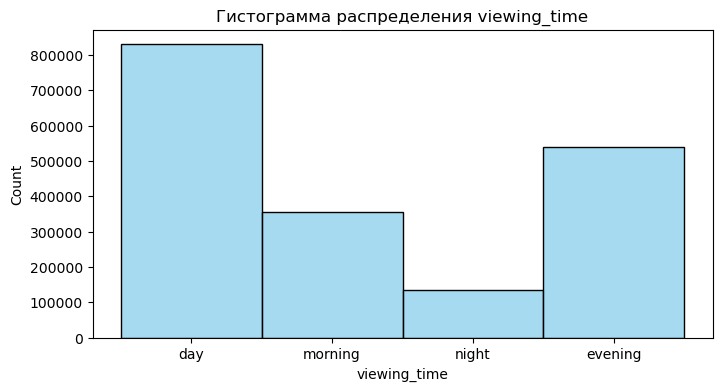

In [123]:
# график распределения по времени посещения сайта
plt.figure(figsize=(8,4))
#plt.xticks(rotation=45)
plt.xlabel('viewing_time')
sns.histplot(data=df_sessions, x='viewing_time', color='skyblue')
plt.title('Гистограмма распределения viewing_time')
plt.show()

#### Признаки на основе utm_source

In [94]:
# в случаях когда пользователь пришел из социальных сетей идентификатор в social_media
social_media =  ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxlTijuriZxsqZqt', 
                'ISrKoXQCxqqYvAZlCvjs', 'IZEXUFLARCUMynmHNBGo', 
                'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']
# создам новый столбец, где указано- пришел из соцсетей 1, с других других ресурсов 0
df_sessions['advert_social_media'] = df_sessions.utm_source.apply(lambda x: 1 if x in social_media else 0)


In [95]:
df_sessions.advert_social_media.value_counts()

advert_social_media
0    1780647
1      79395
Name: count, dtype: int64

#### Признаки на основе utm_medium

In [96]:
# органический трафик — все визиты c ga_sessions.utm_medium in ('organic','referral', '(none)')
# платный трафик — весь неорганический трафик
df_sessions.utm_medium.value_counts(dropna=False)

utm_medium
banner               552752
cpc                  434794
organic              363609
cpm                  242083
referral             152050
email                 29240
push                  28035
stories               10582
cpv                    8022
blogger_channel        8015
smartbanner            6794
blogger_stories        4312
cpa                    4279
tg                     4011
app                    2836
post                   2326
smm                    1985
outlook                1332
clicks                  934
blogger_header          771
info_text               343
sms                     239
landing                 134
partner                  97
fb_smm                   66
vk_smm                   65
link                     57
cbaafe                   47
CPM                      40
yandex_cpc               36
ok_smm                   28
static                   22
google_cpc               20
article                  17
nkp                      14
web_polka

In [97]:
# создам новый признак organic_traffic
# 1 это 'organic','referral' трафик
# ноль весь остальной трафик
df_sessions['organic_traffic'] = df_sessions.apply(lambda x: 1 if x['utm_medium'] == 'organic' or  x['utm_medium'] == 'referral' else 0, axis=1)
df_sessions.organic_traffic.value_counts()

organic_traffic
0    1344383
1     515659
Name: count, dtype: int64

#### Признаки на основе geo_city

In [98]:
# просмотр количества посещений по регионам 
# более 40% из Москвы, немногим меньше из Санкт Петербурга
(df_sessions[df_sessions.geo_city.isin(df_sessions.geo_city.value_counts()[df_sessions.geo_city.value_counts()>10000].index)]
 .geo_city.value_counts() /df_sessions.geo_city.shape * 100)

geo_city
Moscow              43.296280
Saint Petersburg    15.955984
other                4.202701
Yekaterinburg        1.924043
Krasnodar            1.733455
Kazan                1.587652
Samara               1.343626
Nizhny Novgorod      1.194973
Ufa                  1.165511
Novosibirsk          1.159544
Krasnoyarsk          0.878797
Chelyabinsk          0.857561
Tula                 0.850196
Voronezh             0.747725
Rostov-on-Don        0.746542
Irkutsk              0.727510
Grozny               0.685038
Balashikha           0.681651
Vladivostok          0.662619
Name: count, dtype: float64

In [99]:
# создам признак visit_big_city на основе посещений сайта
# 1 если посещениий более 200000 и 0 менее
df_sessions['visit_big_city'] = df_sessions.apply(lambda x: 1 if x['geo_city'] == 'Moscow' or x['geo_city'] == 'Saint Petersburg' else 0, axis=1)
df_sessions.visit_big_city.value_counts()

visit_big_city
1    1102117
0     757925
Name: count, dtype: int64

In [100]:
# создам признак moskow_area для городов московской области
# 1 если город в московской области, 0 когда нет
moskow_region = [
    'Balashikha', 'Bronnitsy', 'Chernogolovka', 'Dmitrov', 'Dolgorudny', 'Domodedovo', 'Dubna', 'Elektrogorsk', 'Elektrostal', 
    'Fryazino', 'Ivanteevka', 'Kashira', 'Klimovsk', 'Kolomna', 'Korolev', 'Kotelniki', 'Krasnogorsk', 'Lytkarino', 'Lobnya', 
    'Losino-Petrovsky', 'Lukhovitsy', 'Lyubertsy', 'Mozhaysk', 'Mytishchi', 'Naro-Fominsk', 'Noginsk', 'Odintsovo', 'Orekhovo-Zuyevo',
    'Pavlovsky Posad', 'Podolsk', 'Pushkino', 'Ramenskoye', 'Reutov', 'Rogovo', 'Ruza', 'Sergiyev Posad', 'Serpukhov', 'Solnechnogorsk',
    'Stupino', 'Taldom', 'Vidnoye', 'Volokolamsk', 'Voskresensk', 'Yakhroma', 'Yegoryevsk', 'Zaraysk', 'Zvenigorod'
]
df_sessions['moskow_area'] = df_sessions.apply(lambda x: 1 if x['geo_city'] in moskow_region else 0, axis=1 )

In [101]:
df_sessions.moskow_area.value_counts()

moskow_area
0    1784856
1      75186
Name: count, dtype: int64

In [102]:
# итоговый датасет
df_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,device_browser,geo_country,geo_city,day_of_the_week,quarter_of_the_year,viewing_time,advert_social_media,organic_traffic,visit_big_city,moskow_area
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Chrome,Russia,Zlatoust,Wednesday,4,day,0,0,0,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,...,Samsung Internet,Russia,Moscow,Sunday,4,morning,0,0,1,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Chrome,Russia,Krasnoyarsk,Tuesday,4,night,0,0,0,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,gecBYcKZCPMcVYdSSzKP,other_content,mobile,...,Chrome,Russia,Moscow,Saturday,2,night,0,0,1,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,gecBYcKZCPMcVYdSSzKP,other_content,mobile,...,Chrome,Russia,Moscow,Saturday,2,night,0,0,1,0


In [103]:
# сохраню датасет дополненный новыими признаками в файл
df_sessions.to_csv('data/ga_sessions_features.csv', index=False)

In [104]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 23 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   session_id                object        
 1   client_id                 object        
 2   visit_date                datetime64[ns]
 3   visit_time                object        
 4   visit_number              int64         
 5   utm_source                object        
 6   utm_medium                object        
 7   utm_campaign              object        
 8   utm_adcontent             object        
 9   device_category           object        
 10  device_os                 object        
 11  device_brand              object        
 12  device_screen_resolution  object        
 13  device_browser            object        
 14  geo_country               object        
 15  geo_city                  object        
 16  day_of_the_week           object        
 17  quarter_

In [105]:
df_sessions.nunique()

session_id                  1860042
client_id                   1391719
visit_date                      226
visit_time                    85318
visit_number                    537
utm_source                      293
utm_medium                       54
utm_campaign                      5
utm_adcontent                     5
device_category                   3
device_os                         7
device_brand                      5
device_screen_resolution       5039
device_browser                    9
geo_country                       2
geo_city                       2548
day_of_the_week                   7
quarter_of_the_year               3
viewing_time                      4
advert_social_media               2
organic_traffic                   2
visit_big_city                    2
moskow_area                       2
dtype: int64